# Payment Date Prediction 
NAME   : R.K.ARAVINDAK KUMAR                                                
HRC_ID : HRC81735W                                                
COLLEGE: S.R.M UMIVERSITY RAMAPURAM CHENNAI                                            


### Importing related Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline
#Some of the libraries are imported right before using it

### Store the dataset into the Dataframe


In [2]:
df = pd.read_csv("final_dataset.csv") 

### Check the shape of the dataframe


In [3]:
df.shape

(50099, 19)

### Check the Detail information of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50099 entries, 0 to 50098
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50099 non-null  object 
 1   cust_number             50099 non-null  object 
 2   name_customer           50099 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50099 non-null  int64  
 5   doc_id                  50099 non-null  int64  
 6   posting_date            50099 non-null  object 
 7   document_create_date    50099 non-null  int64  
 8   document_create_date.1  50099 non-null  int64  
 9   due_in_date             50099 non-null  int64  
 10  invoice_currency        50099 non-null  object 
 11  document type           50099 non-null  object 
 12  posting_id              50099 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50099 non-null

### Display All the column names

In [5]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [6]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50099.000000,5.009900e+04,5.009900e+04,5.009900e+04,5.009900e+04,50099.0,0.0,50099.000000,5.009900e+04,5.009300e+04,50099.000000
mean,2019.307072,2.014112e+09,2.019353e+07,2.019355e+07,2.019369e+07,1.0,NaN,32456.565546,2.019355e+07,2.013216e+09,0.201581
std,0.461284,2.912992e+08,4.501712e+03,4.487779e+03,4.475909e+03,0.0,NaN,39259.249400,4.488339e+03,2.795573e+08,0.401185
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929343e+09,2.019051e+07,2.019051e+07,2.019052e+07,1.0,NaN,4943.480000,2.019051e+07,1.929343e+09,0.000000
50%,2019.000000,1.929968e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17700.000000,2.019091e+07,1.929968e+09,0.000000
75%,2020.000000,1.930621e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47385.590000,2.020013e+07,1.930621e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [7]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200125,20200126,20200210,USD,RV,1,NaN,54273.28,20200126,NAH4,1.930438e+09,0
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190722,20190722,20190811,USD,RV,1,NaN,79656.60,20190722,NAD1,1.929646e+09,0
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190914,20190914,20190929,USD,RV,1,NaN,2253.86,20190914,NAA8,1.929874e+09,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200330,20200330,20200410,CAD,RV,1,NaN,3299.70,20200331,CA10,2.960623e+09,1
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191113,20191113,20191128,USD,RV,1,NaN,33133.29,20191113,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [8]:
null_df = df.isnull().sum().to_frame()
null_df = null_df[null_df[0] > 0]

print("area_business -",null_df.iloc[0,0]/df.shape[0]*100,"%") #converting to fit the format
print("clear_data -",null_df.iloc[1,0]/df.shape[0]*100,"%")
print("clear_data -",null_df.iloc[2,0]/df.shape[0]*100,"%")

area_business - 20.158086987764225 %
clear_data - 100.0 %
clear_data - 0.011976286951835367 %


### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [9]:
df[["invoice_id","doc_id"]][:5]

,invoice_id,doc_id
0,1.930438e+09,1930438491
1,1.929646e+09,1929646410
2,1.929874e+09,1929873765
3,2.960623e+09,2960623488
4,1.930148e+09,1930147974


In [10]:
vt = VarianceThreshold(threshold=0.01)
vt.fit(df[["invoice_id","doc_id"]])
vt.get_support() # looks like most of the values are identical

array([ True,  True])

#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [11]:
date_cols = ["baseline_create_date","document_create_date","document_create_date.1"]
var_thr = VarianceThreshold(threshold = 0.20) #Removing both constant and quasi-constant
var_thr.fit(df[date_cols])

var_thr.get_support() #yes, these date columns have identical observations. 
##SHOULD BE DROPPED Quassi-constant Features

array([ True,  True,  True])

#### Please check, Column 'posting_id' is constant columns or not


In [12]:
constFeatures = [col for col in df.columns if df[col].nunique() == 1]
constFeatures
# yes, it is a constant feature as it has only one value that repeats
##SHOULD BE DROPPED - CONSTANT FEATURE

['posting_id']

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [13]:
df["isOpen"].nunique() ##SHOULD BE DROPPED Quassi-constant Features

2

In [14]:
df['isOpen'].value_counts()

0    40000
1    10099
Name: isOpen, dtype: int64

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [15]:
df.drop(["area_business","posting_id","invoice_id","document_create_date","isOpen","document type","document_create_date.1"], axis=1, inplace=True)


In [16]:
df.shape

(50099, 12)

### Please check from the dataframe whether all the columns are removed or not 

In [17]:
removed = ["area_business","posting_id","invoice_id","document_create_date","isOpen","document type","document_create_date.1"]

for i in range(len(removed)) : # loop to check if columns present in df.columns ndarray
    if removed[i] not in df.columns : print("False") 

False
False
False
False
False
False
False


### Show all the Dublicate rows from the dataframe

In [18]:
df[df.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,200769623,WAL-MAR in,12-03-2019 00:00,2019,1928870382,28-02-2019,20190315,USD,19557.41,20190228,NAH4
2400,U001,200769623,WAL-MAR trust,28-08-2019 00:00,2019,1929758460,18-08-2019,20190902,USD,5600.41,20190818,NAH4
2584,U001,200769623,WAL-MAR corporation,16-12-2019 00:00,2019,1930216806,04-12-2019,20191219,USD,35352.17,20191204,NAH4
3755,U001,200769623,WAL-MAR,22-11-2019 00:00,2019,1930137035,12-11-2019,20191127,USD,2982.64,20191112,NAH4
3873,CA02,140104409,LOB associates,NaN,2020,2960628616,14-04-2020,20200425,CAD,82975.82,20200415,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49963,U001,200759878,SA us,29-01-2019 00:00,2019,1928613993,13-01-2019,20190128,USD,10968.24,20190113,NAH4
49986,U001,200772670,ASSOCIAT foundation,12-06-2019 00:00,2019,1929403090,29-05-2019,20190613,USD,155837.53,20190529,NAU5
49990,U001,200765011,MAINES llc,06-06-2019 00:00,2019,1929365364,22-05-2019,20190606,USD,4008.05,20190522,NAA8
49991,U001,200704045,RA trust,25-10-2019 00:00,2019,1930001131,10-10-2019,20191025,USD,73002.24,20191010,NAA8


### Display the Number of Dublicate Rows

In [19]:
df.duplicated().sum()#total no. of dupes in df

1162

### Drop all the Dublicate Rows

In [20]:
df.drop_duplicates(inplace=True)

#### Now check for all dublicate rows now

- Note - It must be 0 by now

In [21]:
df.duplicated().sum() # yes, 0 duplicate observations

0

### Check for the number of Rows and Columns in your dataset

In [22]:
df.shape

(48937, 12)

### Find out the total count of null values in each columns

In [23]:
df.isnull().sum().sum() # prints total count of nulls in whole dataset

9779

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [24]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year             int64
doc_id                    int64
posting_date             object
due_in_date               int64
invoice_currency         object
total_open_amount       float64
baseline_create_date      int64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [25]:
df[["clear_date","posting_date","due_in_date","baseline_create_date"]].dtypes

clear_date              object
posting_date            object
due_in_date              int64
baseline_create_date     int64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [26]:
df['clear_date'] =  pd.to_datetime(df['clear_date'],
                              format='%Y%m%d',errors="ignore").astype('datetime64[ns]')
 
df['posting_date']=pd.to_datetime(df['posting_date'],format="%Y%m%d",errors='ignore').astype('datetime64[ns]')
 
df['due_in_date']=pd.to_datetime(df['due_in_date'],format="%Y%m%d",errors="ignore")

df['baseline_create_date'] =  pd.to_datetime(df['baseline_create_date'],
                              format='%Y%m%d',errors="ignore")

C:\Users\aravi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '26-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\aravi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '22-07-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\aravi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '14-09-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\aravi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '30-03-2020' in DD/MM/YYYY format. Provide format or specif

### Please check the datatype of all the columns after conversion of the above 4 columns

In [27]:
df[["clear_date","posting_date","due_in_date","baseline_create_date"]].dtypes

clear_date              datetime64[ns]
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
baseline_create_date    datetime64[ns]
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [28]:
df["invoice_currency"].value_counts()

USD    45011
CAD     3926
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [29]:
df["total_open_amount"].values

array([54273.28, 79656.6 ,  2253.86, ..., 92832.27, 92832.27, 92832.27])

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [30]:
df["converted_usd"] = df["total_open_amount"].copy()
CAD_index = df[df["invoice_currency"] == "CAD"].index
for row in CAD_index : df.loc[row,"converted_usd"] *= 0.79 # converts CAD to USD 

### Display the new "converted_usd" column values

In [31]:
df["converted_usd"].head()

0    54273.280
1    79656.600
2     2253.860
3     2606.763
4    33133.290
Name: converted_usd, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [32]:
df["buisness_year"].value_counts()

2019    33975
2020    14962
Name: buisness_year, dtype: int64

In [33]:
df.groupby("buisness_year")["converted_usd"].sum() # sum of converted_usd based on buisness year

buisness_year
2019    1.063007e+09
2020    4.774809e+08
Name: converted_usd, dtype: float64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [34]:
df.drop(["invoice_currency","total_open_amount"], axis=1, inplace=True)

In [35]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd'],
      dtype='object')

### Write a code to check the number of columns in dataframe

In [36]:
df.shape[1] # prints just the number of columns

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [37]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9779
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
baseline_create_date       0
cust_payment_terms         0
converted_usd              0
dtype: int64

#### Find out the number of null values from the column that you got from the above code

In [38]:
df.isnull().sum().sum()

9779

In [39]:
#df.reset_index(inplace=True,drop=True)

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [40]:
maindata = df.dropna(axis=0) # drop np.nan(from clear_date) and paste in maindata
nulldata = df[df["clear_date"].isnull()] # pastes only the rows with null values in clear_date
#maindata.reset_index(inplace=True, drop=True) # to fix the irregularities in indexing
#nulldata.reset_index(inplace=True, drop=True) # to fix the irregularities in indexing

### Check the number of Rows and Columns for both the dataframes 

In [41]:
maindata.shape

(39158, 11)

In [42]:
nulldata.shape

(9779, 11)

### Display the 5 records from maindata and nulldata dataframes

In [43]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.2800
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.6000
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.8600
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.2900
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,17558.4136


In [44]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2606.763
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020
10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.590
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.650
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.060


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [45]:
maindata["Delay"] = maindata["clear_date"] - maindata["due_in_date"] # difference of cleardate and dueindate in Delay

C:\Users\aravi\AppData\Local\Temp\ipykernel_25404\1338313404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata["Delay"] = maindata["clear_date"] - maindata["due_in_date"] # difference of cleardate and dueindate in Delay


### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [46]:
avg_delay = (maindata.groupby('name_customer')['Delay'].mean()).dt.days # grouping based on name_customer and printing mean() of Delay
avg_delay

name_customer
11078 us               -69
17135 associates       -10
17135 llc               -3
236008 associates       -3
99 CE                   16
                        ..
YEN BROS corp            0
YEN BROS corporation    -1
YEN BROS llc            -2
ZARCO co                -1
ZIYAD  us              -83
Name: Delay, Length: 3889, dtype: int64

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [47]:
maindata["avg_delay"] = maindata['name_customer'].map(avg_delay) # mapping avg_delay according to name_customer

C:\Users\aravi\AppData\Local\Temp\ipykernel_25404\3820627160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata["avg_delay"] = maindata['name_customer'].map(avg_delay) # mapping avg_delay according to name_customer


In [48]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.2800,266 days,3
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.6000,-3 days,25
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.8600,92 days,26
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.2900,-3 days,4
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,17558.4136,-175 days,51


### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [49]:
maindata['avg_delay'] = maindata['avg_delay'] * 86400  #converting from days to seconds

C:\Users\aravi\AppData\Local\Temp\ipykernel_25404\1253692783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata['avg_delay'] = maindata['avg_delay'] * 86400  #converting from days to seconds


### Display the maindata dataframe 

In [50]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.2800,266 days,259200
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.6000,-3 days,2160000
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.8600,92 days,2246400
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.2900,-3 days,345600
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,17558.4136,-175 days,4406400


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [51]:
maindata.drop(["Delay","clear_date"], axis=1, inplace=True) # No use as we have delay and avg_delay

C:\Users\aravi\AppData\Local\Temp\ipykernel_25404\2952943818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata.drop(["Delay","clear_date"], axis=1, inplace=True) # No use as we have delay and avg_delay


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [52]:
y = maindata["avg_delay"].to_frame() #dependent variable

In [53]:
X = maindata.drop("avg_delay",axis=1) #independent variables

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [54]:
X_train,X_loc_test,y_train,y_loc_test = train_test_split(X,y,test_size=0.4,train_size=0.6,random_state=1)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [55]:
X_train.shape,X_loc_test.shape,y_train.shape,y_loc_test.shape 

((23494, 10), (15664, 10), (23494, 1), (15664, 1))

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [56]:
X_val,X_test,y_val,y_test = train_test_split(X_loc_test,y_loc_test, test_size=0.5, train_size=0.5,random_state=1)

### Please check for the number of rows and columns of all the 4 dataframes 

In [57]:
X_val.shape,X_test.shape,y_val.shape,y_test.shape

((7832, 10), (7832, 10), (7832, 1), (7832, 1))

# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

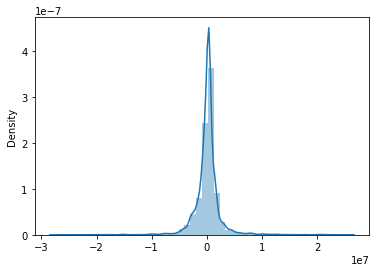

In [58]:
sns.distplot(y_train)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [59]:
grpby_docID_count = X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()# grouping name_cust and printing counts of docId
grpby_docID_count

,name_customer,doc_id
0,11078 us,1
1,17135 associates,1
2,99 CE,1
3,99 CE co,1
4,99 CE corporation,2
...,...,...
3051,YEN BROS,1
3052,YEN BROS co,1
3053,YEN BROS corp,1
3054,YEN BROS corporation,1


### You can make another distribution plot of the "doc_id" column from x_train

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='doc_id', ylabel='Density'>

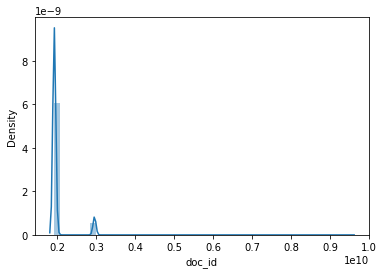

In [60]:
sns.distplot(X_train["doc_id"])

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='buisness_year', ylabel='Density'>

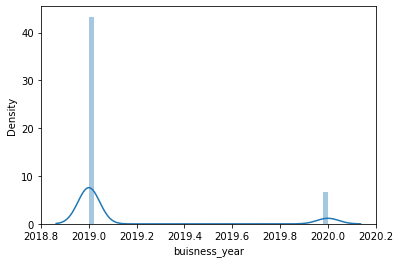

In [61]:
sns.distplot(X_train["buisness_year"])

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

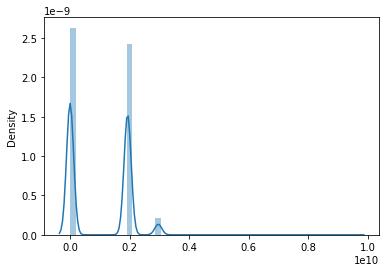

In [62]:
sns.distplot(X_train[["buisness_year","doc_id"]])

# Feature Engineering 

### Display and describe the X_train dataframe 

In [63]:
X_train.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
46683,U001,200769623,WAL-MAR foundation,2019,1930007043,2019-10-13,2019-10-28,2019-10-13,NAH4,38439.45
119,U001,200772595,SAFEW corporation,2019,1928838009,2019-02-21,2019-04-27,2019-02-21,NAGD,2588.65
13099,U001,200494102,MCCA llc,2019,1929296981,2019-10-05,2019-05-26,2019-05-10,C106,48174.00
6451,U001,200726979,BJ'S corporation,2019,1930248414,2019-08-12,2019-12-23,2019-12-08,NAA8,785.99
20492,U001,200759878,SA us,2019,1929092543,2019-06-04,2019-04-21,2019-04-06,NAH4,55825.02


In [64]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.00000,2.349400e+04,23494.000000
mean,2019.13429,2.013695e+09,31053.667691
std,0.34097,2.841794e+08,37178.148961
min,2019.00000,1.928511e+09,0.790000
25%,2019.00000,1.929182e+09,4607.375000
50%,2019.00000,1.929733e+09,17091.170000
75%,2019.00000,1.930212e+09,45979.325000
max,2020.00000,9.500000e+09,668593.360000


In [65]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.00000,2.349400e+04,23494.000000
mean,2019.13429,2.013695e+09,31053.667691
std,0.34097,2.841794e+08,37178.148961
min,2019.00000,1.928511e+09,0.790000
25%,2019.00000,1.929182e+09,4607.375000
50%,2019.00000,1.929733e+09,17091.170000
75%,2019.00000,1.930212e+09,45979.325000
max,2020.00000,9.500000e+09,668593.360000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [66]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train["business_code"])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [67]:
X_train['business_code_enc'] = business_coder.transform(X_train['business_code'])
# Already the column is fit in the above cell, so only transformed here.

In [68]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [69]:
X_train[["business_code","business_code_enc"]]

,business_code,business_code_enc
46683,U001,1
119,U001,1
13099,U001,1
6451,U001,1
20492,U001,1
...,...,...
9723,U001,1
41318,U001,1
6410,CA02,0
15221,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [70]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [71]:
X_train , X_val , X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [72]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [73]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [74]:
label_encoder = EncoderExt() #Encoding name_customer using label Encoder
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [75]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [76]:
label_encoder1 = EncoderExt() #Encoding cust_payment_terms using label Encoder
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [77]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [78]:
X_train.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [79]:
X_val.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [80]:
X_test.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [81]:
# day, month and year extraction from posting_date
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [82]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [83]:
# day, month and year extraction from baseline_create_date
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year


X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year


### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [84]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [85]:
# day, month and year extraction from due_in_date
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year


pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [86]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [87]:
X_train.dtypes, X_val.dtypes,X_test.dtypes

(cust_number                 int32
 buisness_year               int64
 doc_id                      int64
 converted_usd             float64
 business_code_enc           int32
 name_customer_enc           int32
 cust_payment_terms_enc      int32
 day_of_postingdate          int64
 month_of_postingdate        int64
 year_of_postingdate         int64
 day_of_createdate           int64
 month_of_createdate         int64
 year_of_createdate          int64
 day_of_due                  int64
 month_of_due                int64
 year_of_due                 int64
 dtype: object,
 cust_number                 int32
 buisness_year               int64
 doc_id                      int64
 converted_usd             float64
 business_code_enc           int32
 name_customer_enc           int32
 cust_payment_terms_enc      int32
 day_of_postingdate          int64
 month_of_postingdate        int64
 year_of_postingdate         int64
 day_of_createdate           int64
 month_of_createdate         int64
 yea

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [88]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [89]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns)) # number of constant columns present

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [90]:
x_train_T = X_train.T # transposing the dataframe
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values # transposing and checking for dupes

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [91]:
def handling_correlation(X_train,threshold=0.8): # function to filter out the dataframe w.r.t correlation
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [92]:
train=X_train.copy()
handling_correlation(train.copy(),0.85) # prints all the columns that have correlation above 0.85(negative or positive)

['year_of_due',
 'month_of_due',
 'year_of_createdate',
 'year_of_postingdate',
 'day_of_createdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

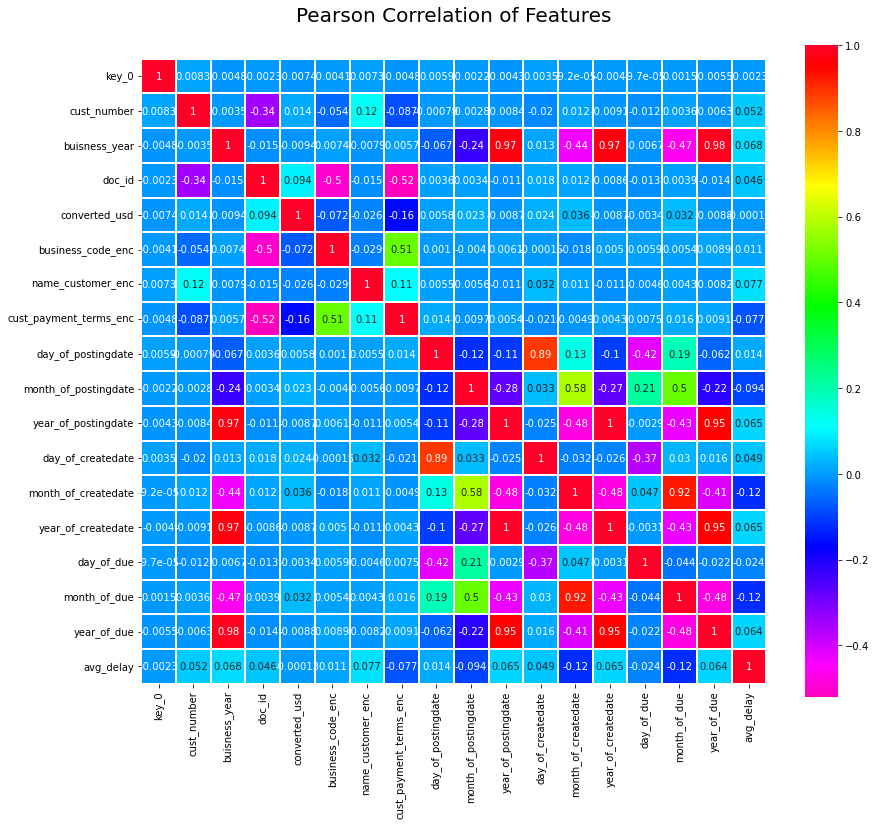

In [93]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)
# heatmap for correlation values with the target values

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [94]:
from sklearn.feature_selection import VarianceThreshold 
sel = VarianceThreshold(threshold=0.80)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [95]:
sel.variances_

array([1.77833834e+15, 1.16255908e-01, 8.07544916e+16, 1.38215593e+09,
       2.95552036e-01, 1.05154705e+06, 1.42931761e+02, 8.17437213e+01,
       1.18351474e+01, 1.17117448e-01, 7.72866281e+01, 1.22464552e+01,
       1.17244688e-01, 7.62405693e+01, 1.20839720e+01, 1.19220664e-01])

### Important features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [96]:
MSE_Score = [] 
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [97]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')

regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [98]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [99]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2450452.428548559

### Display The Comparison Lists

In [100]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[5770612847483.561],[0.05571124629814439],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [101]:
from sklearn.svm import SVR
Algorithm.append('SupportVectorRegression')

regressor_svr = SVR()
regressor_svr.fit(X_train, y_train)
predicted_svr = regressor_svr.predict(X_test)

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [102]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [103]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2450452.428548559

### Display The Comparison Lists

In [104]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegression'],[5770612847483.561, 5770612847483.561],[0.05571124629814439, 0.05571124629814439],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [105]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegressor')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [106]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [107]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

3204347.0365590556

### Display The Comparison Lists

In [108]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegression', 'DecisionTreeRegressor'],[5770612847483.561, 5770612847483.561, 9191984977323.799],[0.05571124629814439, 0.05571124629814439, -0.5041535912547628],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [109]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegressor')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

C:\Users\aravi\AppData\Local\Temp\ipykernel_25404\3313084319.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [110]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [111]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2285179.0603094143

### Display The Comparison Lists


In [112]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegression', 'DecisionTreeRegressor', 'RandomForestRegressor'],[5770612847483.561, 5770612847483.561, 9191984977323.799, 4764434175279.983],[0.05571124629814439, 0.05571124629814439, -0.5041535912547628, 0.22035982513857588],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [113]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

C:\Users\aravi\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\aravi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [114]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [115]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2255811.2996903844

### Display The Comparison Lists


In [116]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGB Regressor'],[5770612847483.561, 5770612847483.561, 9191984977323.799, 4764434175279.983, 4732100794862.164],[0.05571124629814439, 0.05571124629814439, -0.5041535912547628, 0.22035982513857588, 0.22565077920267063],

## You need to make the comparison list into a comparison dataframe 

In [117]:
comp_df = pd.DataFrame(data = [MSE_Score,R2_Score], columns=Algorithm, index = ["MSE_Score","R2_Score"]) # comparing MSE and R2 scores to choose te best one 
comp_df

,LinearRegression,SupportVectorRegression,DecisionTreeRegressor,RandomForestRegressor,XGB Regressor
MSE_Score,5.770613e+12,5.770613e+12,9.191985e+12,4.764434e+12,4.732101e+12
R2_Score,5.571125e-02,5.571125e-02,-5.041536e-01,2.203598e-01,2.256508e-01


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [118]:
comp_df.loc["R2_Score",:].max()# prints best r2 and mse scores
# looks like XBG is the best model

0.22565077920267063

In [119]:
regressorfinal = xgb.XGBRegressor() # For Final data
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

C:\Users\aravi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [120]:
import pickle
# save the model to disk
filename = 'model.sav'
pickle.dump(regressorfinal, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [121]:
mean_squared_error(y_test,predictedfinal,squared=False) # mse score for final test data

2175339.2367311735

### Calculate the mean Square Error for validation dataset

In [122]:
mean_squared_error(y_test,predict_testfinal,squared=False) # mse score for final valid data

2822422.349044391

### Calculate the R2 score for test

In [123]:
r2_score(y_test, predictedfinal) #r2 score for test data

0.22565077920267063

### Calculate the R2 score for Validation

In [124]:
r2_score(y_val, predict_testfinal) #r2 score for test valid

0.19105935390814766

### Calculate the Accuracy for train Dataset 

In [125]:
regressorfinal.score(X_train, y_train)  #Accuracy score for train data

0.6341217445868657

### Calculate the accuracy for validation

In [126]:
regressorfinal.score(X_val, y_val) #Accuracy score for valid data

0.19105935390814766

### Calculate the accuracy for test

In [127]:
regressorfinal.score(X_test, y_test) #Accuracy score for test data

0.22565077920267063

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here


From looking at all the 5 machine learning models and their corresponding R2 Scores and mean_square_errors,
XGboost performs significantly better than other models. Yes, other models performs good especially the tree models ,but not as much as XGboost.

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [128]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2606.763
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020
10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.590
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.650
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.060


### Check for the number of rows and columns in the nulldata

In [129]:
nulldata.shape

(9779, 11)

### Check the Description and Information of the nulldata 

In [130]:
nulldata.describe()

,buisness_year,doc_id,converted_usd
count,9779.0,9.779000e+03,9779.000000
mean,2020.0,2.015730e+09,32867.836229
std,0.0,2.824983e+08,36073.160953
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930660e+09,5753.735000
50%,2020.0,1.930732e+09,19460.580000
75%,2020.0,1.930821e+09,49222.130000
max,2020.0,2.960636e+09,653644.800000


In [131]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779 entries, 3 to 50098
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9779 non-null   object        
 1   cust_number           9779 non-null   object        
 2   name_customer         9779 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9779 non-null   int64         
 5   doc_id                9779 non-null   int64         
 6   posting_date          9779 non-null   datetime64[ns]
 7   due_in_date           9779 non-null   datetime64[ns]
 8   baseline_create_date  9779 non-null   datetime64[ns]
 9   cust_payment_terms    9779 non-null   object        
 10  converted_usd         9779 non-null   float64       
dtypes: datetime64[ns](4), float64(1), int64(2), object(4)
memory usage: 916.8+ KB


### Storing the Nulldata into a different dataset 
# for BACKUP

In [132]:
nulldata_backUp = nulldata.copy() # will be needing this copy

In [133]:
nulldata.head() 
###############################PREPARING NULL_DATA STARTS FROM HERE#######################################

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2606.763
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020
10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.590
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.650
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.060


### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [134]:
from sklearn.preprocessing import LabelEncoder # encoding business code from object to int using labelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

C:\Users\aravi\AppData\Local\Temp\ipykernel_25404\4101675576.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])


### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [135]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
# encoding cust_number from object to int

C:\Users\aravi\AppData\Local\Temp\ipykernel_25404\2529478923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [136]:
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day     ###### NULL VALUES SHOULD DROP #################
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month ##### NULL VALUES SHOULD DROP #################
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year   ##### NULL VALUES SHOULD DROP ################


###########################          datetime to int          ################################################
nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year


nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

C:\Users\aravi\AppData\Local\Temp\ipykernel_25404\1777033206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day     ###### NULL VALUES SHOULD DROP #################
C:\Users\aravi\AppData\Local\Temp\ipykernel_25404\1777033206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month ##### NULL VALUES SHOULD DROP #################
C:\Users\aravi\AppData\Local\Temp\ipykernel_25404\177703320

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [137]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])
#transforming the code into its corresponding places

C:\Users\aravi\AppData\Local\Temp\ipykernel_25404\1259940177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
C:\Users\aravi\AppData\Local\Temp\ipykernel_25404\1259940177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
C:\Users\aravi\AppData\Local\Temp\ipykernel_25404\1259940177.py:3: SettingWithCopyWarning: 
A value is trying to

### Check for the datatypes of all the columns of Nulldata

In [138]:
nulldata.dtypes

business_code                     object
cust_number                        int32
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int32
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_ter

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [139]:
drop_cols = ["business_code","baseline_create_date","due_in_date","posting_date","name_customer","clear_date",
                "cust_payment_terms","day_of_cleardate","month_of_cleardate","year_of_cleardate"]
nulldata.drop(drop_cols, axis=1, inplace=True) #dropping unsignificant columns

C:\Users\aravi\AppData\Local\Temp\ipykernel_25404\3440110197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata.drop(drop_cols, axis=1, inplace=True) #dropping unsignificant columns


### Check the information of the "nulldata" dataframe

In [140]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779 entries, 3 to 50098
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9779 non-null   int32  
 1   buisness_year           9779 non-null   int64  
 2   doc_id                  9779 non-null   int64  
 3   converted_usd           9779 non-null   float64
 4   business_code_enc       9779 non-null   int32  
 5   day_of_postingdate      9779 non-null   int64  
 6   month_of_postingdate    9779 non-null   int64  
 7   year_of_postingdate     9779 non-null   int64  
 8   day_of_due              9779 non-null   int64  
 9   month_of_due            9779 non-null   int64  
 10  year_of_due             9779 non-null   int64  
 11  day_of_createdate       9779 non-null   int64  
 12  month_of_createdate     9779 non-null   int64  
 13  year_of_createdate      9779 non-null   int64  
 14  cust_payment_terms_enc  9779 non-null  

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [141]:
(nulldata.info(),X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779 entries, 3 to 50098
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9779 non-null   int32  
 1   buisness_year           9779 non-null   int64  
 2   doc_id                  9779 non-null   int64  
 3   converted_usd           9779 non-null   float64
 4   business_code_enc       9779 non-null   int32  
 5   day_of_postingdate      9779 non-null   int64  
 6   month_of_postingdate    9779 non-null   int64  
 7   year_of_postingdate     9779 non-null   int64  
 8   day_of_due              9779 non-null   int64  
 9   month_of_due            9779 non-null   int64  
 10  year_of_due             9779 non-null   int64  
 11  day_of_createdate       9779 non-null   int64  
 12  month_of_createdate     9779 non-null   int64  
 13  year_of_createdate      9779 non-null   int64  
 14  cust_payment_terms_enc  9779 non-null  

(None, None)

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [142]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [143]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [144]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd', # pasting necessary columns into a new variable
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [145]:
nulldata2.head() # final dataset for prediction of avg_delay

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020,2960623488,2606.763,67,2688,4,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020,1930659387,11173.020,67,2771,20,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020,1930610806,3525.590,67,90,20,3,11,2020,11,3,2020,26,3,2020
14,200739534,2020,1930788296,121105.650,67,2012,20,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020,1930817482,3726.060,67,718,36,23,4,2020,16,4,2020,26,4,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [146]:
regressor_fin = xgb.XGBRegressor() # using XGB for prediction
regressor_fin.fit(X_train, y_train)
final_result = regressorfinal.predict(nulldata2)# predicting avg_delay using xgb and storing in final_result

C:\Users\aravi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [147]:
final_result = pd.DataFrame(final_result,columns=['avg_delay']) # converting it into dataframe

### Display the "avg_delay" column

In [148]:
final_result

,avg_delay
0,3328798.000
1,1419469.875
2,2414624.250
3,-2042047.750
4,-1651799.250
...,...
9774,1461205.750
9775,1461205.750
9776,1461205.750
9777,1461205.750


### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [149]:
# merging nulldata1 and fianl_result
nulldata_backUp.reset_index(drop=True)
nulldata1 = nulldata_backUp.reset_index(drop=True) 
Final = nulldata1.join(final_result, on=nulldata1.index)

### Display the "Final" dataframe 

In [150]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2606.7630,3328798.000
1,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.0200,1419469.875
2,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.5900,2414624.250
3,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.6500,-2042047.750
4,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.0600,-1651799.250
...,...,...,...,...,...,...,...,...,...,...,...,...
9774,CA02,140106408,WAL-M corp,NaT,2020,2960618884,2020-06-03,2020-03-16,2020-03-06,CA10,73337.4933,1461205.750
9775,CA02,140106408,WAL-M corp,NaT,2020,2960618885,2020-06-03,2020-03-16,2020-03-06,CA10,73337.4933,1461205.750
9776,CA02,140106408,WAL-M corp,NaT,2020,2960618886,2020-06-03,2020-03-16,2020-03-06,CA10,73337.4933,1461205.750
9777,CA02,140106408,WAL-M corp,NaT,2020,2960618887,2020-06-03,2020-03-16,2020-03-06,CA10,73337.4933,1461205.750


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [151]:
Final.shape

(9779, 12)

In [152]:
Final.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int64
doc_id                           int64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
baseline_create_date    datetime64[ns]
cust_payment_terms              object
converted_usd                  float64
avg_delay                      float32
dtype: object

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [153]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')
#clear date from avg delay as due in date

### Display the "clear_date" column

In [154]:
Final['clear_date'] # Final Predicted cler dates from the model XGB

0      2020-05-18 12:39:58.000
1      2020-04-19 10:17:49.875
2      2020-04-22 22:43:44.250
3      2020-04-06 08:45:52.250
4      2020-04-06 21:10:00.750
                 ...          
9774   2020-04-01 21:53:25.750
9775   2020-04-01 21:53:25.750
9776   2020-04-01 21:53:25.750
9777   2020-04-01 21:53:25.750
9778   2020-04-01 21:53:25.750
Name: clear_date, Length: 9779, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [155]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1) # converting avg delay seconds to days format

### Display the "avg_delay" column 

In [156]:
Final['avg_delay']

0       38.0
1       16.0
2       27.0
3      -24.0
4      -20.0
        ... 
9774    16.0
9775    16.0
9776    16.0
9777    16.0
9778    16.0
Name: avg_delay, Length: 9779, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [157]:
bins= [0,15,30,45,60,100] 
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False) 
############################ biining to segregate each range to a section of labels ##############################

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [158]:
Final.drop(["avg_delay"],axis=1,inplace=True) #dropping as we have age bucket

### Display the count of each categoty of new "Aging Bucket" column 

In [159]:
Final["Aging Bucket"].value_counts()

0-15               3344
16-30              2791
31-45               821
46-60               222
Greatar than 60     168
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [160]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,140105686,SYSC llc,2020-05-18 12:39:58.000,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2606.7630,31-45
1,U001,200744019,TARG us,2020-04-19 10:17:49.875,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.0200,16-30
2,U001,200418007,AM,2020-04-22 22:43:44.250,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.5900,16-30
3,U001,200739534,OK systems,2020-04-06 08:45:52.250,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.6500,NaN
4,U001,200353024,DECA corporation,2020-04-06 21:10:00.750,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.0600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9774,CA02,140106408,WAL-M corp,2020-04-01 21:53:25.750,2020,2960618884,2020-06-03,2020-03-16,2020-03-06,CA10,73337.4933,16-30
9775,CA02,140106408,WAL-M corp,2020-04-01 21:53:25.750,2020,2960618885,2020-06-03,2020-03-16,2020-03-06,CA10,73337.4933,16-30
9776,CA02,140106408,WAL-M corp,2020-04-01 21:53:25.750,2020,2960618886,2020-06-03,2020-03-16,2020-03-06,CA10,73337.4933,16-30
9777,CA02,140106408,WAL-M corp,2020-04-01 21:53:25.750,2020,2960618887,2020-06-03,2020-03-16,2020-03-06,CA10,73337.4933,16-30


### Store this dataframe into the .csv format

In [161]:
# Final.to_csv("HRC81735W_R.K.ARAVINDAK_KUMAR.csv") #updating it to a csv file

In [162]:
####################################################THANK YOU!!!#######################################################

# END OF THE PROJECT